# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import csv
import urllib

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

617


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
# Starting URL for Weather MAP API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#List of City data
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create Counter
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes:
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    #Group cities in sets of 50 for logging purposes:
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    #Add 1 to the record count
    record_count += 1
    
    #Run on API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate that Data Loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fare
Processing Record 2 of Set 1 | khash
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | payo
Processing Record 12 of Set 1 | shingu
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | tarudant
City not found. Skipping...
Processing Record 15 of Set 1 | preobrazheniye
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | grindavik
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1

Processing Record 34 of Set 4 | chengde
Processing Record 35 of Set 4 | clyde river
Processing Record 36 of Set 4 | kahului
Processing Record 37 of Set 4 | port hedland
Processing Record 38 of Set 4 | husavik
Processing Record 39 of Set 4 | fort nelson
Processing Record 40 of Set 4 | la ronge
Processing Record 41 of Set 4 | tamiahua
Processing Record 42 of Set 4 | coquimbo
Processing Record 43 of Set 4 | sao filipe
Processing Record 44 of Set 4 | hobyo
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | adrar
Processing Record 47 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 48 of Set 4 | santa rosalia
Processing Record 49 of Set 4 | sitka
Processing Record 0 of Set 5 | tawkar
City not found. Skipping...
Processing Record 1 of Set 5 | farrukhnagar
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set 5 | otjiwarongo
Processing Record 4 of Set 5 | tuktoyaktuk
Processing Record 5 of Set 5 | san ramon de la nueva oran
Processing Reco

Processing Record 18 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 19 of Set 8 | opuwo
Processing Record 20 of Set 8 | chapais
Processing Record 21 of Set 8 | saint-leu
Processing Record 22 of Set 8 | tevaitoa
Processing Record 23 of Set 8 | baft
Processing Record 24 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 25 of Set 8 | lavrentiya
Processing Record 26 of Set 8 | kiama
Processing Record 27 of Set 8 | artigas
Processing Record 28 of Set 8 | sampit
Processing Record 29 of Set 8 | kattivakkam
Processing Record 30 of Set 8 | dospat
Processing Record 31 of Set 8 | alpine
Processing Record 32 of Set 8 | beringovskiy
Processing Record 33 of Set 8 | geraldton
Processing Record 34 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 35 of Set 8 | makubetsu
Processing Record 36 of Set 8 | ulaangom
Processing Record 37 of Set 8 | bandar-e torkaman
City not found. Skipping...
Processing Record 38 of Set 8 | washougal
Processing 

Processing Record 1 of Set 12 | palatka
Processing Record 2 of Set 12 | santo angelo
Processing Record 3 of Set 12 | quelimane
Processing Record 4 of Set 12 | sabha
Processing Record 5 of Set 12 | wuhu
Processing Record 6 of Set 12 | bambous virieux
Processing Record 7 of Set 12 | lac du bonnet
Processing Record 8 of Set 12 | padang
Processing Record 9 of Set 12 | alcantara
Processing Record 10 of Set 12 | lebowakgomo
Processing Record 11 of Set 12 | port pirie
Processing Record 12 of Set 12 | kyabe
Processing Record 13 of Set 12 | san carlos
Processing Record 14 of Set 12 | kamen-rybolov
Processing Record 15 of Set 12 | chuguyevka
Processing Record 16 of Set 12 | vredendal
Processing Record 17 of Set 12 | wuwei
Processing Record 18 of Set 12 | ozinki
Processing Record 19 of Set 12 | hastings
Processing Record 20 of Set 12 | tateyama
Processing Record 21 of Set 12 | ushibuka
Processing Record 22 of Set 12 | lompoc
Processing Record 23 of Set 12 | astaneh-ye ashrafiyeh
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
# Convert array of JSONs into Pandas Dataframe
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the dataframe
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

#Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

#Show Record Count
city_data_pd.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [31]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,fare,0,PF,1538263224,100,-16.70,-151.02,77.50,6.40
1,khash,0,IR,1538263224,34,28.22,61.21,42.67,2.59
2,albany,20,US,1538261460,53,42.65,-73.75,60.98,4.70
3,qaanaaq,68,GL,1538262629,100,77.48,-69.36,16.75,4.38
4,rikitea,24,PF,1538262603,100,-23.12,-134.97,73.09,12.21


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

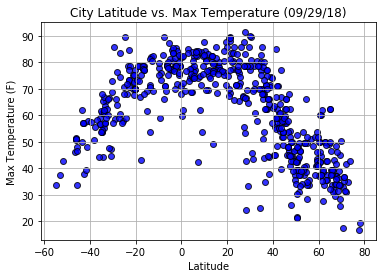

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            color="blue",
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Output/Fig1.png")

#Show plot
plt.show()

#### Latitude vs. Humidity Plot

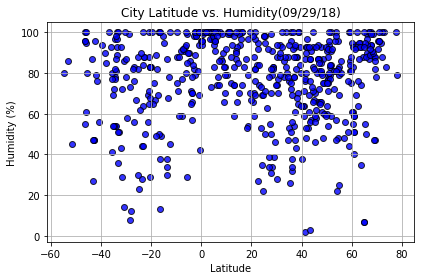

In [33]:
# Build the scatter plots for latitude vs. humidity plot
plt.scatter(lats,
            humidity,
            color="blue",
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Plot
plt.savefig("Output/fig1.png")

# Show Plot
plt.tight_layout()
plt.show()

#### Latitude vs. Cloudiness Plot

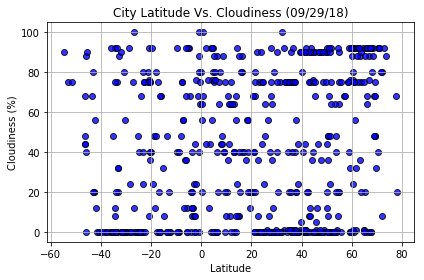

In [34]:
#Build the scatter plots for latitude vs. cloudiness plot
plt.scatter(lats,
            cloudiness,
            color="blue", 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Plot
plt.savefig("Output/fig2.png")

#Show Plot
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

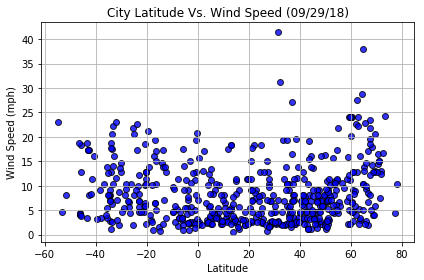

In [35]:
#Build the scatter plots for latitude vs. wind speed plot
plt.scatter(lats,
            wind_speed,
            color="blue",
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

#Format Plot
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save
plt.savefig("Output/fig4.png")

#Show Plot
plt.tight_layout()
plt.show()